In [0]:
import urllib
url="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/data/titanic.csv"
response=urllib.request.urlopen(url)
html=response.read()
with open('titanic.csv','wb') as f:
    f.write(html)
import pandas as pd
df=pd.read_csv("titanic.csv",header=0)
#映射特征
df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)
#将embarked属性列中，保留NAN值的行，将特征映射
df["embarked"]=df["embarked"].dropna().map({'S':0,'C':1,'Q':2}).astype(int)
#添加新的列
def get_family_size(sibsp,parch):
    family_size=sibsp+parch
    return family_size
df["family_size"]=df[["sibsp","parch"]].apply(lambda x:get_family_size(x["sibsp"],x["parch"]),axis=1)


In [0]:
print(df.head())

   pclass  ... family_size
0       1  ...           0
1       1  ...           3
2       1  ...           3
3       1  ...           3
4       1  ...           3

[5 rows x 12 columns]


In [0]:
df.to_csv("processed_titanic.csv",index=False)

linear regression


np.array(range(30))  output:array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
       

np.vstack((X,y))
np.vstack([X,y])------X 30×1  y  30×1  after 2×30

np.hstack([X,y])-----                              after 60×1

In [0]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
args=Namespace(seed=1234,data_file="sample_data.csv",num_samples=100,train_size=0.75,test_size=0.25,num_epochs=100)
np.random.seed(args.seed)#generate the same random number

#generate the data
def generate_data(num_samples):
  X=np.array(range(num_samples)) 
  y=3.65*X+10
  return X,y

#generate the random data
X,y=generate_data(args.num_samples)
data=np.vstack([X,y]).T
df=pd.DataFrame(data,columns=['X','y'])
df.head()

,X,y
0,0.0,10.00
1,1.0,13.65
2,2.0,17.30
3,3.0,20.95
4,4.0,24.60


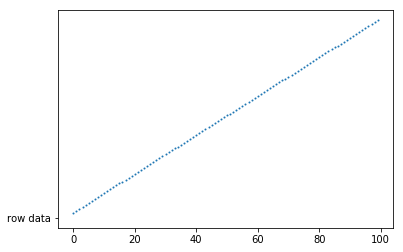

In [0]:
#draw a scatter
plt.plot("row data")
plt.scatter(x=df['X'],y=df['y'],s=1)
plt.show()

**1. ** 

sklearn.preprocessing
standardlize data:
z-score 
minMax 

**2.   **

train_test_splitのレシピ　　
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://newtechnologylifestyle.net/rain_test_split%E9%96%A2%E6%95%B0%E3%82%92%E4%BD%BF%E7%94%A8%E3%81%97%E3%81%A6%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E5%88%86%E5%89%B2%E3%81%99%E3%82%8B/

**3.**

df['X'].values   #(30,)

df['X'].values.T #(30,)

df['X'].values.reshape(-1,1)  #(30,1)

df['X'].values.reshape(1,-1) #(1,30)

**4.**

df['y'] series object of pandas.core.series module

X_train,X_test,y_train,y_test=train_test_split(df["X"].values.reshape(-1,1),df["y"],test_size=args.test_size,random_state=args.seed)

==>
y_train <class 'pandas.core.series.Series'>



X_train,X_test,y_train,y_test=train_test_split(df["X"].values.reshape(-1,1),df["y"].values.reshape(-1,1),test_size=args.test_size,random_state=args.seed)

==>y_train <class 'numpy.ndarray'>

In [0]:
from sklearn.linear_model.stochastic_gradient import SGDRegressor #梯度下降法
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #cross vertification

#depart the  data into train_data and test_data
X_train,X_test,y_train,y_test=train_test_split(df["X"].values.reshape(-1,1),df["y"].values.reshape(-1,1),test_size=args.test_size,random_state=args.seed)
print("X_train:{}\ny_train:{}\nX_test:{}\ny_test{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

X_train:(75, 1)
y_train:(75, 1)
X_test:(25, 1)
y_test(25, 1)


In [0]:
print(type(y_train))

<class 'numpy.ndarray'>


**5.**

transfer multi-dimension array into one-dimension array 

ravel（）返回的是视图，意味着改变元素的值会影响原始数组；
flatten（）返回的是拷贝，意味着改变元素的值不会影响原始数组。

y_train (30,1)   after ravel()  (30,)

**6.**

StandardScaler()のレシピ　
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

？？为什么用train的均值和方差对test进行标准化操作

????为什么将y转化为一维数组

**7.**




In [0]:
#standardize
###compute the mean and var
X_scaler=StandardScaler().fit(X_train)
y_scaler=StandardScaler().fit(y_train)
#standardize
std_X_train=X_scaler.transform(X_train)
std_y_train=y_scaler.transform(y_train).ravel()
std_X_test=X_scaler.transform(X_test)
std_y_test=X_scaler.transform(y_test).ravel()


In [0]:
#should be 0 1
print("mean:",np.mean(std_X_train,axis=0),np.mean(std_y_train,axis=0))
print("std:",np.std(std_X_train,axis=0),np.std(std_y_train,axis=0))

mean: [8.22952817e-17] -1.5617137213060536e-16
std: [1.] 0.9999999999999999


In [0]:
print(X_scaler.mean_,X_scaler.var_,X_scaler.n_samples_seen_,X_scaler.scale_)

[46.4] [831.33333333] 75 [28.83285163]


In [0]:
print(std_X_train.shape)

(75, 1)


**8.**

SGDのレシピ    基于随机梯度下降法估计参数的线性回归
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

lm=SGDRegressor(loss,penalty,alpha,l1_ratio,fit_intercept,max_iter,tol,shuffle,verbose,epsilon,random_state,learning_rate,eta0,power_t,early_stoppng,validation_fraction,n_iter_no_change,warm_start,average)


Attributes(属性)

lm.coef_    -----weights  系数

lm.intercept_  ------截距

average_coef_-----averaged weights

n_iter_-----

Methods(方法)

lm.densify(..)

lm.fit(..)-----Fit linear model with Stochasitic Gradient Descent

lm.get_params(..)

lm.partial_fit(..)

lm.predict(...)

lm.score(...)

lm.set_params(...)

lm.sparsify(...)

https://www.jianshu.com/p/b6770257d97b


**9.**
squared_loss最小二乘法

loss functionの比較
https://mp.weixin.qq.com/s/Xbi5iOh3xoBIK5kVmqbKYA

**10.**

预测结果需要进行反标准化。 系数和截距也需要反标准化


**11.**

(75, ) 和(75,1)进行运算的时候需要注意

用reshape(-1,1)将(75,  )转化为(75, 1)

In [0]:
#initial the model---8,9
lm=SGDRegressor(loss="squared_loss",penalty="none",max_iter=args.num_epochs)
#training
lm.fit(X=std_X_train,y=std_y_train)
#predict---10
pred_train=(lm.predict(std_X_train)*np.sqrt(y_scaler.var_))+y_scaler.mean_
pred_test=(lm.predict(std_X_test)*np.sqrt(y_scaler.var_))+y_scaler.mean_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [0]:
#mse
train_mse = np.mean((y_train - pred_train.reshape(-1,1)) ** 2)
test_mse = np.mean((y_test - pred_test.reshape(-1,1)) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 0.00, test_MSE: 0.00


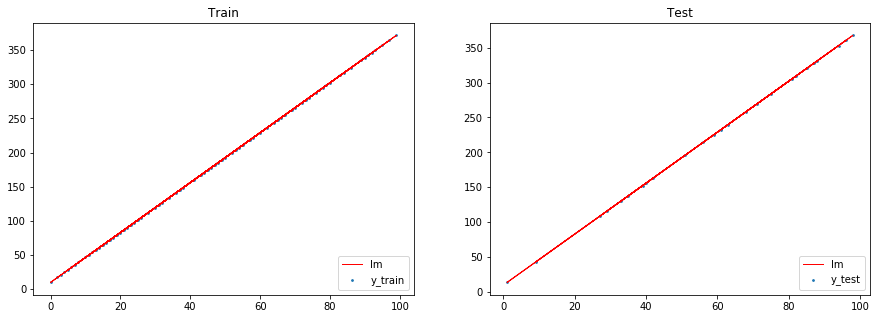

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Train")
plt.scatter(X_train,y_train,label="y_train",s=3)
plt.plot(X_train,pred_train,label="lm",color="red",linewidth=1)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.title("Test")
plt.scatter(X_test,y_test,label="y_test",s=3)
plt.plot(X_test,pred_test,label="lm",color="red",linewidth=1)
plt.legend(loc='lower right')

plt.show()

In [0]:
#infer
X_infer=np.array((0,1,2),dtype=np.float32)#(3,)
std_X_infer=X_scaler.transform(X_infer.reshape(-1,1))#标准化
#print(X_infer.shape)
pred_infer=(lm.predict(std_X_infer)*np.sqrt(y_scaler.var_))+y_scaler.mean_
print(pred_infer)
df.head(3)

[10.00356575 13.65348546 17.30340518]


,X,y
0,0.0,10.00
1,1.0,13.65
2,2.0,17.30


In [0]:
print(y_train.shape)

**12.**

y_scaler.scale_     

scale_=np.sqrt(var_) 标准差

**13.**

系数和截距的反标准化

见图1 二维的


In [0]:
print(y_scaler.scale_,type(y_scaler.scale_),y_scaler.scale_.shape)
print(X_scaler.scale_,type(X_scaler.scale_),X_scaler.scale_.shape)
print(X_scaler.mean_.shape)
#标准化的系数和截距
print(lm.coef_,type(lm.coef_),lm.coef_.shape)
print(lm.intercept_,type(lm.intercept_),lm.intercept_.shape)

[105.23990846] <class 'numpy.ndarray'> (1,)
[28.83285163] <class 'numpy.ndarray'> (1,)
(1,)
[0.99997884] <class 'numpy.ndarray'> (1,)
[-1.55262445e-07] <class 'numpy.ndarray'> (1,)


In [0]:
#反标准化--13,10
coef=lm.coef_*(y_scaler.scale_/X_scaler.scale_)
intercept=lm.intercept_*y_scaler.scale_+y_scaler.mean_-coef*X_scaler.mean_#？？？加上np.sum(coef*X_scaler.mean_)的用意
print(coef)
print(intercept)

[3.64992275]
[10.00356788]


正则化
https://blog.csdn.net/red_stone1/article/details/80755144

https://www.cnblogs.com/yxwkf/p/5268577.html

在经验风险上加上一个正则化项(regularizer)或者罚项(penalty term)

L1正则化：在原来损失函数上加上权重参数的绝对值

L2正则化：在原来的损失函数上加上权重参数的平方和

正则化参数numda
损失函数=样本误差+正则化项*numda





In [0]:
#初始化带有L2正则化的模型
lm=SGDRegressor(loss="squared_loss",penalty='l2',alpha=1e-2,max_iter=args.num_epochs)
lm.fit(X=std_X_train,y=std_y_train)
pred_train=(lm.predict(std_X_train)*np.sqrt(y_scaler.var_))+y_scaler.mean_#fun-standardize
pred_test=(lm.predict(std_X_test)*np.sqrt(y_scaler.var_))+y_scaler.mean_

#compute mse
train_mse=np.mean((y_train-pred_train.reshape(-1,1))**2)#11
test_mse=np.mean((y_test-pred_test.reshape(-1,1))**2)
print("train_MSE:{0:.2f},test_MSE:{1:.2f}".format(train_mse,test_mse))


train_MSE:1.09,test_MSE:1.15


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [0]:
print(y_train.shape,pred_train.shape)

(75, 1) (75,)


In [0]:
coef=lm.coef_*(y_scaler.scale_/X_scaler.scale_)
intercept=lm.intercept_*y_scaler.scale_+y_scaler.mean_-coef*X_scaler.mean_#？？？加上np.sum(coef*X_scaler.mean_)的用意
print(coef)
print(intercept)

[3.6138691]
[11.67661724]


pandas.get_dummies()
https://blog.csdn.net/maymay_/article/details/80198468

one hot 编码
将类别变量转换为机器学习算法易于利用的形式



In [0]:
cat_data=pd.DataFrame(['a','b','c','d'],columns=['favorite_letter'])
cat_data

,favorite_letter
0,a
1,b
2,c
3,d


In [0]:
dummy_cat_data=pd.get_dummies(cat_data)
dummy_cat_data

,favorite_letter_a,favorite_letter_b,favorite_letter_c,favorite_letter_d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
